In [1]:
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
url = "https://media.githubusercontent.com/media/RecepTahirGunlu/Duygu-Tanima/master/train.csv"
train_data = pd.read_csv(url)

In [3]:
train_pixels = train_data.pixel_values.str.split(" ").tolist() 

train_pixels = pd.DataFrame(train_pixels, dtype=int)
train_images = train_pixels.values
train_images = train_images.astype(np.float)

<ipython-input-3-d19d62363e03>:3: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  train_pixels = pd.DataFrame(train_pixels, dtype=int)
<ipython-input-3-d19d62363e03>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_images = train_images.astype(np.float)


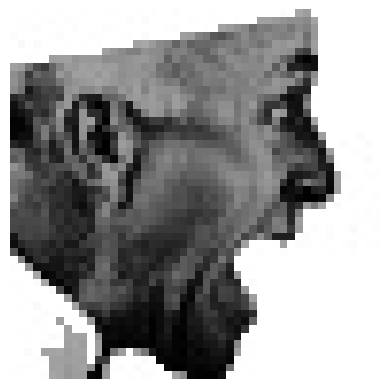

In [4]:
def show(img):
    show_image = img.reshape(48,48)
    
    plt.axis('off')
    plt.imshow(show_image, cmap='gray')
    
show(train_images[54])

In [5]:
train_labels_flat = train_data["emotion"].values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]


def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

y_train = dense_to_one_hot(train_labels_flat, train_labels_count)

y_train = y_train.astype(np.uint8)

print(y_train)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [6]:
url = "https://media.githubusercontent.com/media/RecepTahirGunlu/Duygu-Tanima/master/validation.csv"
test_data = pd.read_csv(url)
test_pixels = test_data.pixel_values.str.split(" ").tolist() 

test_pixels = pd.DataFrame(test_pixels, dtype=int)
test_images = test_pixels.values
test_images = test_images.astype(np.float)

<ipython-input-6-151e24bdfde4>:5: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  test_pixels = pd.DataFrame(test_pixels, dtype=int)
<ipython-input-6-151e24bdfde4>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_images = test_images.astype(np.float)


In [7]:
test_labels_flat = test_data["emotion"].values.ravel()
test_labels_count = np.unique(test_labels_flat).shape[0]

y_test = dense_to_one_hot(test_labels_flat, test_labels_count)

y_test = y_test.astype(np.uint8)

In [8]:
x_train = train_images.reshape(-1, 48, 48, 1)
x_test = test_images.reshape(-1, 48, 48, 1)

In [23]:
model = Sequential()

# 1 . katman 

model.add(Conv2D(64, 3, data_format='channels_last', kernel_initializer="he_normal", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# yeni katman
#model.add(Conv2D(64, 3))
#model.add(BatchNormalization())
#model.add(Activation('relu'))

# 2. katman

model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.3))

# 3. katman

model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 4. katman

model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 5. katman

model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.3))

# verktoilizasyon yapıyoruz

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# cikis katmani

model.add(Dense(7))
model.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(learning_rate=.0001)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 batch_normalization_39 (Bat  (None, 46, 46, 64)       256       
 chNormalization)                                                
                                                                 
 activation_45 (Activation)  (None, 46, 46, 64)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_40 (Bat  (None, 44, 44, 64)       256       
 chNormalization)                                                
                                                                 
 activation_46 (Activation)  (None, 44, 44, 64)       

In [24]:
epochs = 50
batchSize = 100

history = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    shuffle=True,
                    batch_size=batchSize, 
                    validation_data=(x_test, y_test), 
                    verbose=2)

Epoch 1/100
322/322 - 19s - loss: 1.6839 - accuracy: 0.3680 - val_loss: 1.6941 - val_accuracy: 0.3783 - 19s/epoch - 59ms/step
Epoch 2/100
322/322 - 12s - loss: 1.3210 - accuracy: 0.4977 - val_loss: 1.2175 - val_accuracy: 0.5341 - 12s/epoch - 38ms/step
Epoch 3/100
322/322 - 12s - loss: 1.2039 - accuracy: 0.5452 - val_loss: 1.2375 - val_accuracy: 0.5336 - 12s/epoch - 38ms/step
Epoch 4/100
322/322 - 12s - loss: 1.1342 - accuracy: 0.5716 - val_loss: 1.0854 - val_accuracy: 0.5858 - 12s/epoch - 38ms/step
Epoch 5/100
322/322 - 12s - loss: 1.0893 - accuracy: 0.5894 - val_loss: 1.1048 - val_accuracy: 0.5786 - 12s/epoch - 39ms/step
Epoch 6/100
322/322 - 12s - loss: 1.0550 - accuracy: 0.6004 - val_loss: 1.0998 - val_accuracy: 0.5782 - 12s/epoch - 39ms/step
Epoch 7/100
322/322 - 12s - loss: 1.0186 - accuracy: 0.6168 - val_loss: 1.0644 - val_accuracy: 0.5898 - 12s/epoch - 39ms/step
Epoch 8/100
322/322 - 12s - loss: 0.9924 - accuracy: 0.6229 - val_loss: 1.0950 - val_accuracy: 0.5900 - 12s/epoch - 38